In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Upload the Excel file
from google.colab import files
uploaded = files.upload()

# Load sheets
xls = pd.ExcelFile("BDM Project (final submission).xlsx")
market_df = xls.parse("Market")
sales_df = xls.parse("Sales")
product_df = xls.parse("Product_id")
customer_df = xls.parse("Customer")


Saving BDM Project (final submission).xlsx to BDM Project (final submission) (1).xlsx


**The data is available for a period of two months from 01/01/2025 to 02/03/2025.**

# **Data Cleaning**

In [ ]:
# Convert 'Date' to datetime
for df in [market_df, sales_df, customer_df]:
    df['Date'] = pd.to_datetime(df['Date'])

# Clean 'Qty(KG)' column
market_df['Qty(KG)'] = market_df['Qty(KG)'].str.replace("Kg", "").astype(float)

# Merge Sales + Market
merged_df = pd.merge(sales_df, market_df, on=["Date", "Product_Id"], suffixes=('_Sales', '_Market'))

# Merge with Product_id
merged_df = pd.merge(merged_df, product_df, on="Product_Id", how="left")



In [ ]:
merged_df.shape

(1159, 12)

# Preliminary Analysis

In [ ]:
# Calculate Margin per Kg
merged_df['Margin_per_Kg'] = merged_df['Selling_Price_per_Kg(Rs)'] - merged_df['Wholesale_Price(Rs)']

# Calculate Margin Percentage
merged_df['Margin_%'] = (merged_df['Margin_per_Kg'] / merged_df['Wholesale_Price(Rs)']) * 100

# Calculate Wastage (in %)
merged_df['Wastage_%'] = ((merged_df['Stock_Purchased(KG)'] - merged_df['Stock_Sold(KG)']) / merged_df['Stock_Purchased(KG)']) * 100

# Revenue and Profit
merged_df['Profit(Rs)'] = merged_df['Revenue_Generated(Rs)'] - (merged_df['Stock_Sold(KG)'] * merged_df['Wholesale_Price(Rs)'])


1. Revenue over the time period

In [ ]:
# Ensure Date column is datetime type
merged_df["Date"] = pd.to_datetime(merged_df["Date"])

# Filter for the date range
filtered_df = merged_df[(merged_df["Date"] >= "2025-01-01") & (merged_df["Date"] <= "2025-03-02")]

# Group by Date to get daily revenue
daily_revenue = filtered_df.groupby("Date")["Revenue_Generated(Rs)"].sum().reset_index()

# Calculate the average daily revenue
avg_daily_revenue = daily_revenue["Revenue_Generated(Rs)"].mean()
print(f"Average Daily Revenue (01-01-2025 to 02-03-2025): ₹{avg_daily_revenue:.2f}")


Average Daily Revenue (01-01-2025 to 02-03-2025): ₹3979.99


/tmp/ipython-input-150-3564023732.py:13: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.barplot(x='Month', y='Revenue_Generated(Rs)', data=monthly_revenue, palette='viridis')


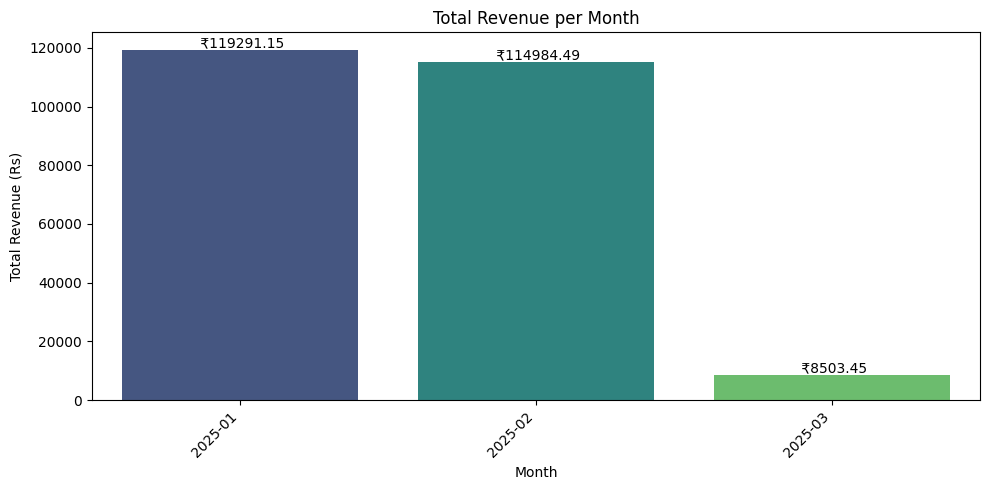

In [ ]:
import matplotlib.pyplot as plt
# Generate a month column
merged_df['Month'] = merged_df['Date'].dt.to_period('M')

# Calculate total revenue per month
monthly_revenue = merged_df.groupby('Month')['Revenue_Generated(Rs)'].sum().reset_index()

# Convert Month to string for plotting
monthly_revenue['Month'] = monthly_revenue['Month'].astype(str)

# Generate the bar chart
plt.figure(figsize=(10, 5))
ax = sns.barplot(x='Month', y='Revenue_Generated(Rs)', data=monthly_revenue, palette='viridis')
plt.title('Total Revenue per Month')
plt.xlabel('Month')
plt.ylabel('Total Revenue (Rs)')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()

for container in ax.containers:
    ax.bar_label(container, fmt=' ₹%.2f')
plt.show()


In [ ]:
filtered_df.head()

,Date,Product_Id,Product_Name_Sales,Stock_Purchased(KG),Stock_Sold(KG),Selling_Price_per_Kg(Rs),Revenue_Generated(Rs),Stock_remained_(KG),Product_Name_Market,Wholesale_Price(Rs),Qty(KG),Product_Name,Margin_per_Kg,Margin_%,Wastage_%,Profit(Rs)
0,2025-01-01,V001,Tomato,8,4,62.40,249.60,4,Tomato,46.34,1.0,Tomato,16.06,34.656884,50.000000,64.24
1,2025-01-01,V002,Brinjal,6,5,43.85,219.25,1,Brinjal,32.35,1.0,Brinjal,11.50,35.548686,16.666667,57.50
2,2025-01-01,V003,Carrot,10,7,63.27,442.89,3,Carrot,45.85,1.0,Carrot,17.42,37.993457,30.000000,121.94
3,2025-01-01,V004,Capsicum,7,4,48.60,194.40,3,Capsicum,34.92,1.0,Capsicum,13.68,39.175258,42.857143,54.72
4,2025-01-01,V005,Ladysfinger,10,7,17.12,119.84,3,Ladysfinger,13.06,1.0,Ladysfinger,4.06,31.087289,30.000000,28.42


In [ ]:
# prompt: Like above calculate average daily profit from 01-01-2025 to 02-03-2025

# Calculate the average daily profit
daily_profit = filtered_df.groupby("Date")["Profit(Rs)"].sum().reset_index()

# Calculate the average daily profit
avg_daily_profit = daily_profit["Profit(Rs)"].mean()
print(f"Average Daily Profit (01-01-2025 to 02-03-2025): ₹{avg_daily_profit:.2f}")


Average Daily Profit (01-01-2025 to 02-03-2025): ₹1033.19


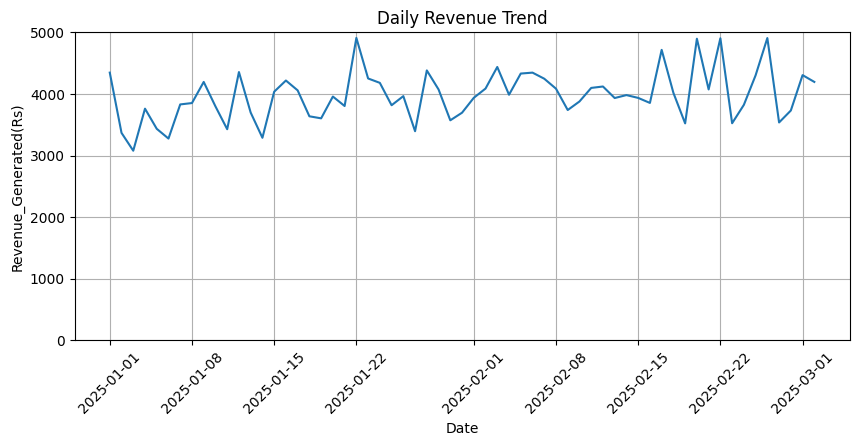

In [ ]:
# Revenue trend
plt.figure(figsize=(10,4))
sns.lineplot(data=merged_df.groupby("Date")["Revenue_Generated(Rs)"].sum().reset_index(), x="Date", y="Revenue_Generated(Rs)")
plt.title('Daily Revenue Trend')
plt.xticks(rotation=45)
plt.ylim(bottom=0)
plt.grid(True)
plt.show()


In [ ]:
df['Date'] = pd.to_datetime(df['Date'], dayfirst=True)

# Group by date to compute average daily wholesale price
daily_revenue = merged_df.groupby('Date')['Revenue_Generated(Rs)'].mean()

# Generate descriptive statistics
wholesale_summary2 = daily_revenue.describe()

print(wholesale_summary2)

count     61.000000
mean     209.472899
std       21.665382
min      162.047368
25%      196.407368
50%      208.705263
75%      222.058947
max      258.501579
Name: Revenue_Generated(Rs), dtype: float64


2. Daily Profit Trend

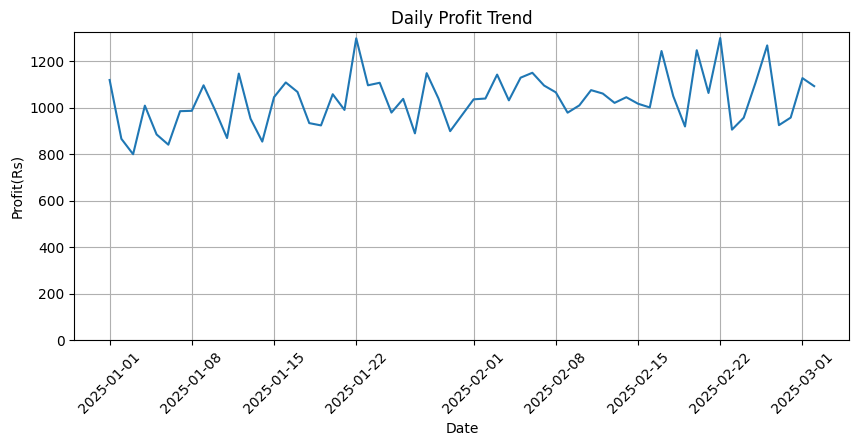

In [ ]:
# Daily Profit trend
plt.figure(figsize=(10,4))
sns.lineplot(data=merged_df.groupby("Date")["Profit(Rs)"].sum().reset_index(), x="Date", y="Profit(Rs)")
plt.title('Daily Profit Trend')
plt.xticks(rotation=45)
plt.ylim(bottom=0)
plt.grid(True)
plt.show()


In [ ]:
df['Date'] = pd.to_datetime(df['Date'], dayfirst=True)

# Group by date to compute average daily wholesale price
daily_profit = merged_df.groupby('Date')['Profit(Rs)'].mean()

# Generate descriptive statistics
wholesale_summary1 = daily_profit.describe()

print(wholesale_summary1)

count    61.000000
mean     54.378343
std       5.855308
min      42.082632
25%      50.371053
50%      54.607895
75%      57.680000
max      68.363684
Name: Profit(Rs), dtype: float64


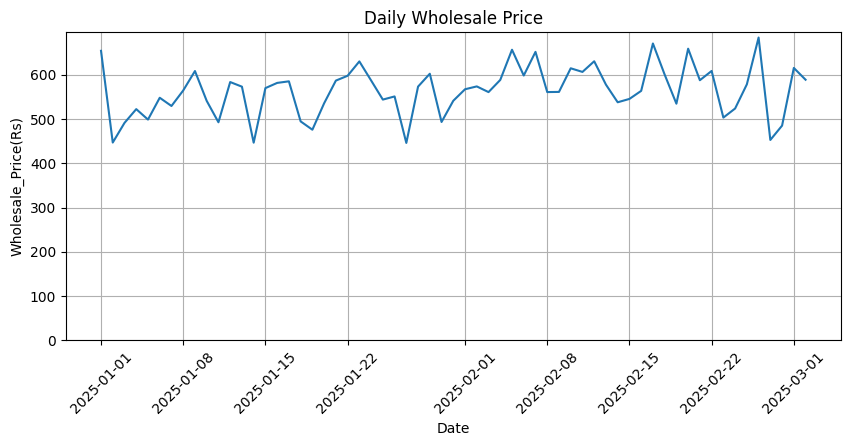

In [ ]:
# Daily Wholesale Price
plt.figure(figsize=(10,4))
sns.lineplot(data=merged_df.groupby("Date")["Wholesale_Price(Rs)"].sum().reset_index(), x="Date", y="Wholesale_Price(Rs)")
plt.title('Daily Wholesale Price')
plt.xticks(rotation=45)
plt.ylim(bottom=0)
plt.grid(True)
plt.show()


In [ ]:
df['Date'] = pd.to_datetime(df['Date'], dayfirst=True)

# Group by date to compute average daily wholesale price
daily_wholesale = merged_df.groupby('Date')['Wholesale_Price(Rs)'].mean()

# Generate descriptive statistics
wholesale_summary = daily_wholesale.describe()

print(wholesale_summary)

count    61.000000
mean     29.682183
std       2.993988
min      23.482105
25%      28.154211
50%      30.007895
75%      31.506316
max      36.027895
Name: Wholesale_Price(Rs), dtype: float64


Plot to start with

/tmp/ipython-input-40-3969291072.py:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.barplot(x=top_customers.values, y=top_customers.index, palette="Blues_r")


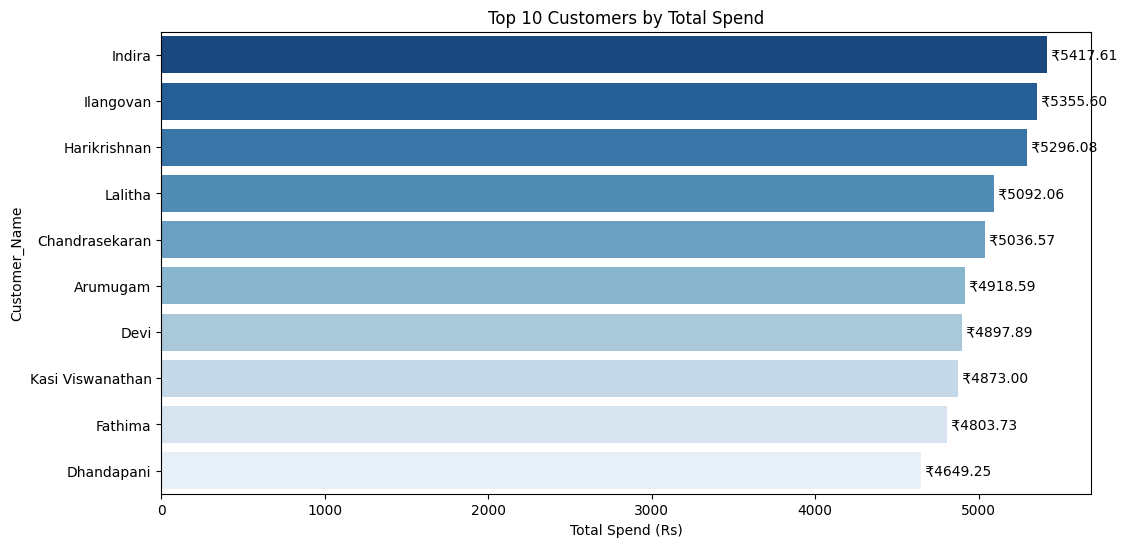

In [ ]:
import matplotlib.pyplot as plt
# Plot to start with
top_customers = customer_df.groupby('Customer_Name')["Total_Price(Rs)"].sum().sort_values(ascending=False).head(10)

plt.figure(figsize=(12,6))
ax = sns.barplot(x=top_customers.values, y=top_customers.index, palette="Blues_r")
plt.title('Top 10 Customers by Total Spend')
plt.xlabel('Total Spend (Rs)')

# Add values on top of the bars
for container in ax.containers:
    ax.bar_label(container, fmt=' ₹%.2f')

plt.show()


# Margin vs Stock Sold
sns.scatterplot(data=merged_df, x="Margin_per_Kg", y="Stock_Sold(KG)")
plt.title("Price Sensitivity: Margin vs Quantity Sold")


In [ ]:
import pandas as pd

# Load the Excel file
xls = pd.ExcelFile("/content/BDM Project (final submission) (1).xlsx")

# Read necessary sheets
sales_df = xls.parse("Sales")
market_df = xls.parse("Market")

# Convert 'Date' columns to datetime for consistency
sales_df['Date'] = pd.to_datetime(sales_df['Date'])
market_df['Date'] = pd.to_datetime(market_df['Date'])

# Clean 'Qty(KG)' column in Market
market_df['Qty(KG)'] = market_df['Qty(KG)'].str.replace("Kg", "").astype(float)

# Merge Sales and Market on 'Date' and 'Product_Id'
merged_df = pd.merge(sales_df, market_df, on=["Date", "Product_Id"], suffixes=('_Sales', '_Market'))

# Calculate Profit per Kg
merged_df['Profit_per_Kg'] = merged_df['Selling_Price_per_Kg(Rs)'] - merged_df['Wholesale_Price(Rs)']

# Calculate Profit Margin (%) based on Wholesale Price (Cost-based margin)
merged_df['Profit_Margin_%'] = (merged_df['Profit_per_Kg'] / merged_df['Wholesale_Price(Rs)']) * 100

# Calculate Total Profit per Product (Profit per Kg * Stock Sold)
merged_df['Total_Profit(Rs)'] = merged_df['Profit_per_Kg'] * merged_df['Stock_Sold(KG)']

# Preview the updated dataset with calculated profit margin
merged_df[['Date', 'Product_Id', 'Wholesale_Price(Rs)', 'Selling_Price_per_Kg(Rs)',
           'Stock_Sold(KG)', 'Profit_per_Kg', 'Profit_Margin_%', 'Total_Profit(Rs)']].head()


,Date,Product_Id,Wholesale_Price(Rs),Selling_Price_per_Kg(Rs),Stock_Sold(KG),Profit_per_Kg,Profit_Margin_%,Total_Profit(Rs)
0,2025-01-01,V001,46.34,62.40,4,16.06,34.656884,64.24
1,2025-01-01,V002,32.35,43.85,5,11.50,35.548686,57.50
2,2025-01-01,V003,45.85,63.27,7,17.42,37.993457,121.94
3,2025-01-01,V004,34.92,48.60,4,13.68,39.175258,54.72
4,2025-01-01,V005,13.06,17.12,7,4.06,31.087289,28.42


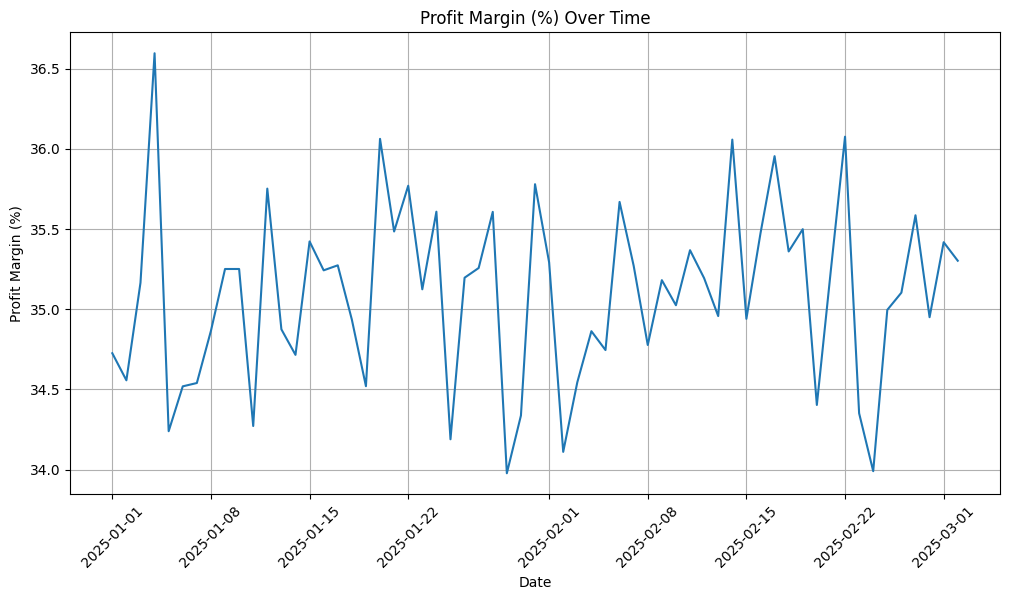

In [ ]:
# prompt: Generate a line plot for the profit margin over the time

import matplotlib.pyplot as plt
# Group by date and calculate the mean profit margin
profit_margin_over_time = merged_df.groupby('Date')['Profit_Margin_%'].mean().reset_index()

# Create the line plot
plt.figure(figsize=(12, 6))
sns.lineplot(x='Date', y='Profit_Margin_%', data=profit_margin_over_time)
plt.title('Profit Margin (%) Over Time')
plt.xlabel('Date')
plt.ylabel('Profit Margin (%)')
plt.xticks(rotation=45)
plt.grid(True)
plt.show()


In [ ]:
merged_df.head()

,Date,Product_Id,Product_Name_Sales,Stock_Purchased(KG),Stock_Sold(KG),Selling_Price_per_Kg(Rs),Revenue_Generated(Rs),Stock_remained_(KG),Product_Name_Market,Wholesale_Price(Rs),Qty(KG),Profit_per_Kg,Profit_Margin_%,Total_Profit(Rs)
0,2025-01-01,V001,Tomato,8,4,62.40,249.60,4,Tomato,46.34,1.0,16.06,34.656884,64.24
1,2025-01-01,V002,Brinjal,6,5,43.85,219.25,1,Brinjal,32.35,1.0,11.50,35.548686,57.50
2,2025-01-01,V003,Carrot,10,7,63.27,442.89,3,Carrot,45.85,1.0,17.42,37.993457,121.94
3,2025-01-01,V004,Capsicum,7,4,48.60,194.40,3,Capsicum,34.92,1.0,13.68,39.175258,54.72
4,2025-01-01,V005,Ladysfinger,10,7,17.12,119.84,3,Ladysfinger,13.06,1.0,4.06,31.087289,28.42


# Profit Margin Analysis

In [ ]:
# Step 1: Calculate Total Cost and Total Revenue per transaction
merged_df["Total_Cost(Rs)"] = merged_df["Wholesale_Price(Rs)"] * merged_df["Stock_Sold(KG)"]
merged_df["Total_Revenue(Rs)"] = merged_df["Selling_Price_per_Kg(Rs)"] * merged_df["Stock_Sold(KG)"]

# Step 2: Calculate Profit
merged_df["Profit(Rs)"] = merged_df["Total_Revenue(Rs)"] - merged_df["Total_Cost(Rs)"]

# Step 3: Calculate Margin Percentage
merged_df["Profit_Margin(%)"] = (merged_df["Profit(Rs)"] / merged_df["Total_Cost(Rs)"]) * 100

# Display few rows
merged_df[['Date', 'Product_Id', 'Product_Name_Sales', 'Total_Cost(Rs)', 'Total_Revenue(Rs)', 'Profit(Rs)', 'Profit_Margin(%)']].head()


,Date,Product_Id,Product_Name_Sales,Total_Cost(Rs),Total_Revenue(Rs),Profit(Rs),Profit_Margin(%)
0,2025-01-01,V001,Tomato,185.36,249.60,64.24,34.656884
1,2025-01-01,V002,Brinjal,161.75,219.25,57.50,35.548686
2,2025-01-01,V003,Carrot,320.95,442.89,121.94,37.993457
3,2025-01-01,V004,Capsicum,139.68,194.40,54.72,39.175258
4,2025-01-01,V005,Ladysfinger,91.42,119.84,28.42,31.087289


In [ ]:
# Overall mean, median, and spread of Profit Margin
mean_margin = merged_df["Profit_Margin(%)"].mean()
median_margin = merged_df["Profit_Margin(%)"].median()
std_margin = merged_df["Profit_Margin(%)"].std()

print(f"Mean Profit Margin: {mean_margin:.2f}%")
print(f"Median Profit Margin: {median_margin:.2f}%")
print(f"Standard Deviation of Profit Margin: {std_margin:.2f}%")


Mean Profit Margin: 35.10%
Median Profit Margin: 35.17%
Standard Deviation of Profit Margin: 2.90%


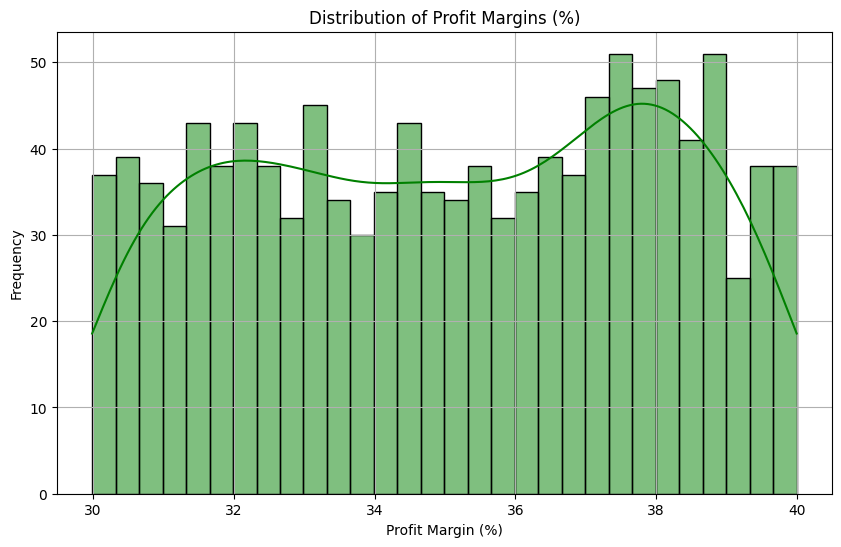

In [ ]:
plt.figure(figsize=(10,6))
sns.histplot(merged_df["Profit_Margin(%)"], kde=True, color="green", bins=30)
plt.title("Distribution of Profit Margins (%)")
plt.xlabel("Profit Margin (%)")
plt.ylabel("Frequency")
plt.grid(True)
plt.show()


/tmp/ipython-input-73-2325672030.py:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.barplot(x=product_margin.values, y=product_margin.index, palette="coolwarm")


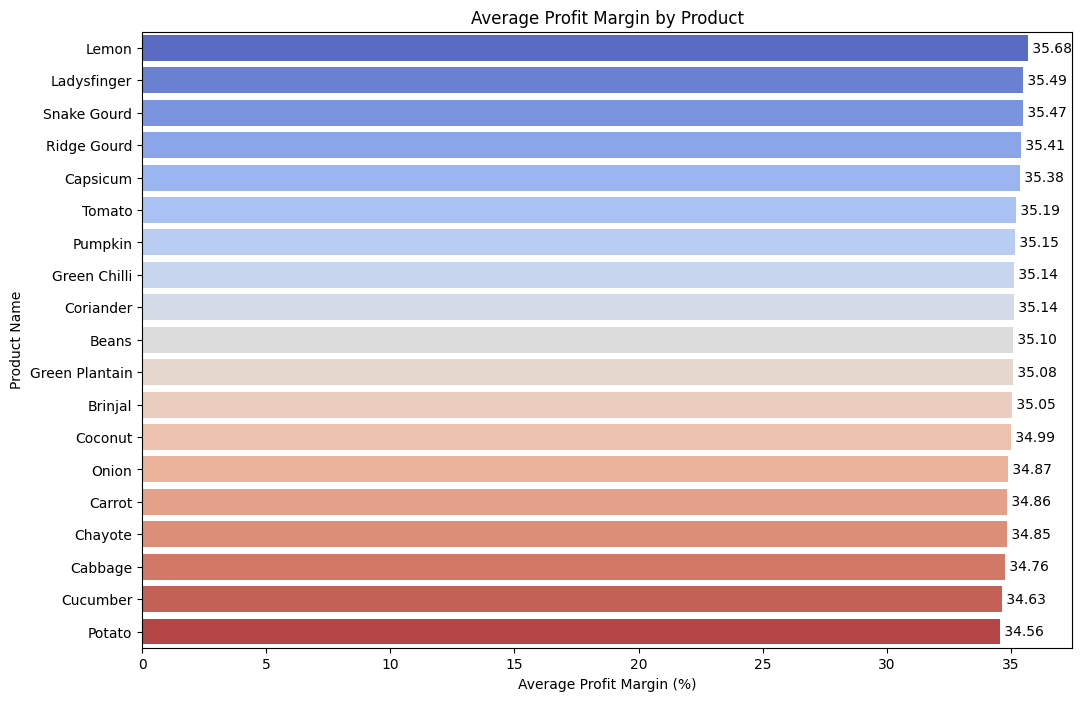

In [ ]:
# Average margin per product
product_margin = merged_df.groupby("Product_Name_Sales")["Profit_Margin(%)"].mean().sort_values(ascending=False)

plt.figure(figsize=(12,8))
ax = sns.barplot(x=product_margin.values, y=product_margin.index, palette="coolwarm")
plt.title("Average Profit Margin by Product")
plt.xlabel("Average Profit Margin (%)")
plt.ylabel("Product Name")

for container in ax.containers:
    ax.bar_label(container, fmt=' %.2f')
plt.show()


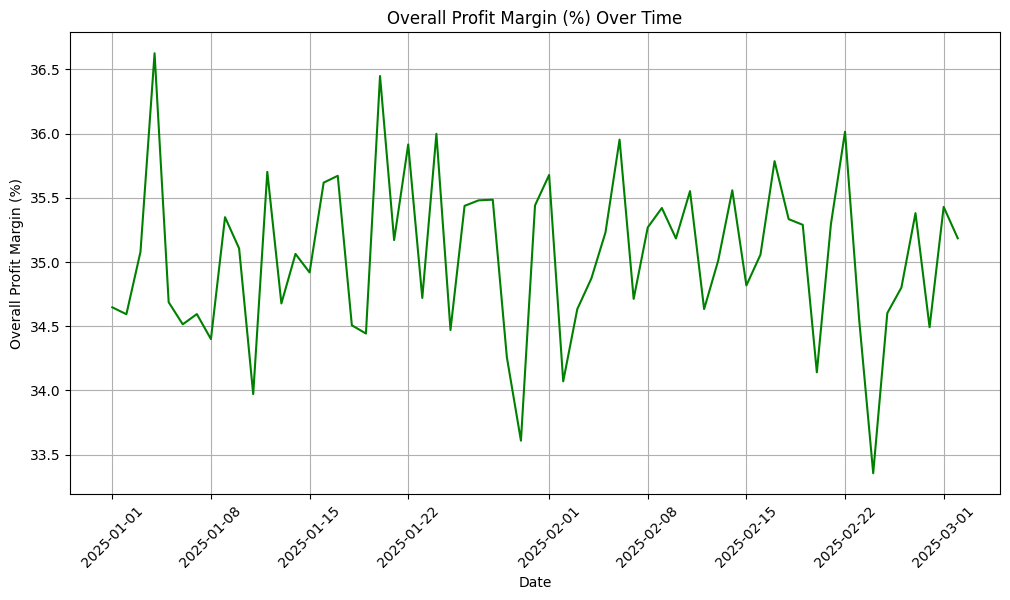

In [ ]:
# prompt: Generate the line plot for the profit margin

import matplotlib.pyplot as plt
# Calculate the overall profit margin over time
# Group by date and calculate the total profit and total cost for each day
daily_profit_cost = merged_df.groupby('Date').agg({
    'Profit(Rs)': 'sum',
    'Total_Cost(Rs)': 'sum'
}).reset_index()

# Calculate the daily profit margin percentage
daily_profit_cost['Overall_Profit_Margin(%)'] = (daily_profit_cost['Profit(Rs)'] / daily_profit_cost['Total_Cost(Rs)']) * 100

# Create the line plot for overall profit margin
plt.figure(figsize=(12, 6))
sns.lineplot(x='Date', y='Overall_Profit_Margin(%)', data=daily_profit_cost, color="green")
plt.title('Overall Profit Margin (%) Over Time')
plt.xlabel('Date')
plt.ylabel('Overall Profit Margin (%)')
plt.xticks(rotation=45)
plt.grid(True)
plt.show()

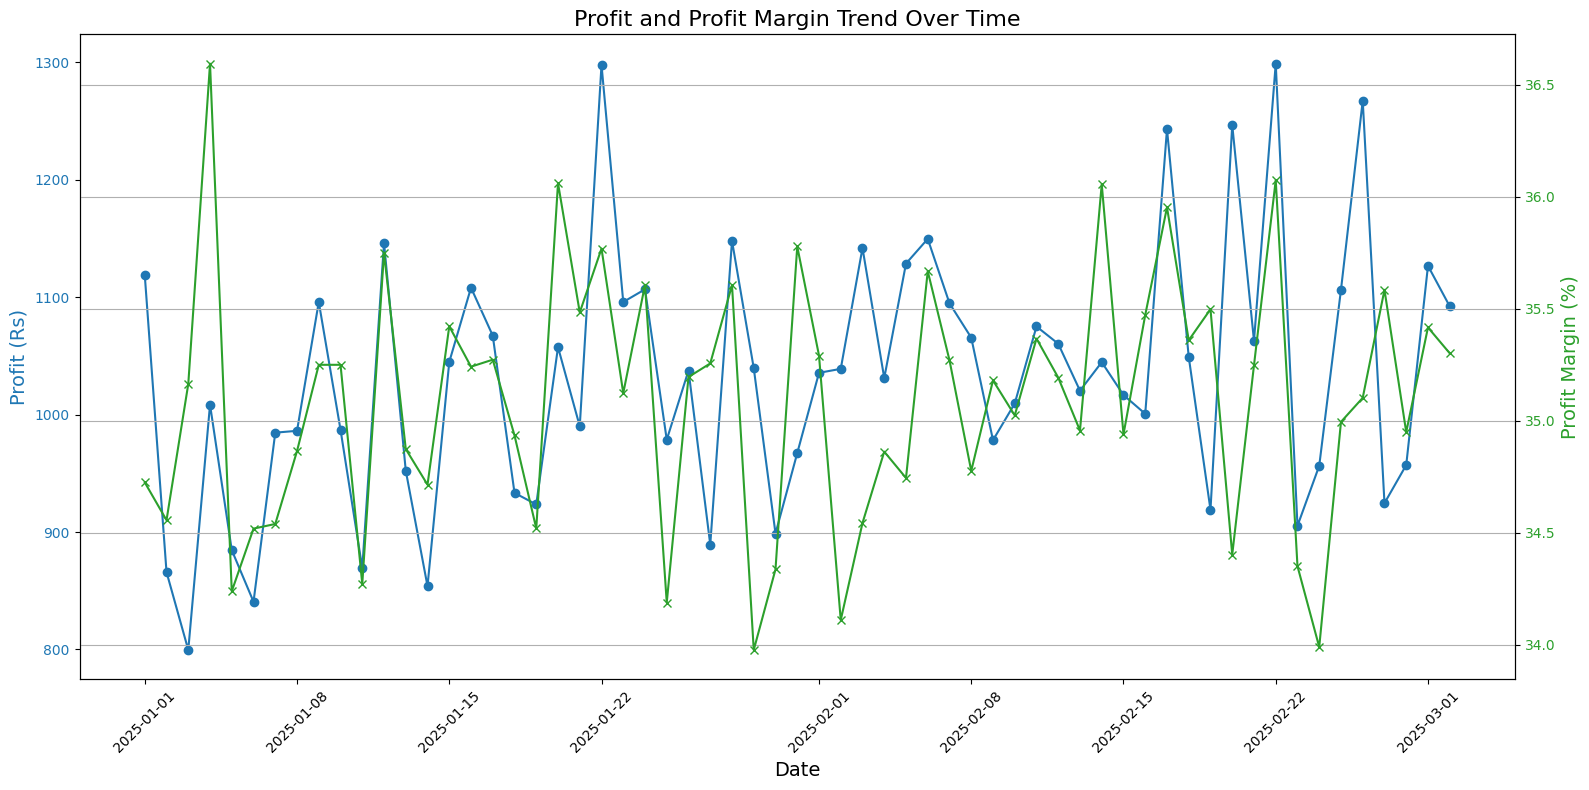

In [ ]:
import matplotlib.pyplot as plt

# Aggregate daily profit and margin
profit_margin_trend = merged_df.groupby("Date").agg({
    "Profit(Rs)": "sum",
    "Profit_Margin(%)": "mean"
}).reset_index()

# Create figure and axis
fig, ax1 = plt.subplots(figsize=(16,8))

# Plot Profit on primary y-axis
color = 'tab:blue'
ax1.set_xlabel("Date", fontsize=14)
ax1.set_ylabel("Profit (Rs)", color=color, fontsize=14)
ax1.plot(profit_margin_trend["Date"], profit_margin_trend["Profit(Rs)"], color=color, marker='o', label='Profit (Rs)')
ax1.tick_params(axis='y', labelcolor=color)
ax1.tick_params(axis='x', rotation=45)

# Create secondary y-axis for Profit Margin
ax2 = ax1.twinx()
color = 'tab:green'
ax2.set_ylabel("Profit Margin (%)", color=color, fontsize=14)
ax2.plot(profit_margin_trend["Date"], profit_margin_trend["Profit_Margin(%)"], color=color, marker='x', label='Profit Margin (%)')
ax2.tick_params(axis='y', labelcolor=color)

# Title and layout
plt.title("Profit and Profit Margin Trend Over Time", fontsize=16)
fig.tight_layout()
plt.grid(True)
plt.show()


In [ ]:
# Calculate the correlation coefficient between 'Profit(Rs)' and 'Profit_Margin(%)'
correlation = merged_df[['Profit(Rs)', 'Profit_Margin(%)']].corr().iloc[0, 1]

print(f"The correlation between Profit and Profit Margin is: {correlation:.4f}")

The correlation between Profit and Profit Margin is: 0.1470


This indicates a weak correlation. Low Profit, High Margin:
Conversely, a company might be generating a smaller overall profit (low profit), but a larger percentage of its revenue remains as profit, leading to a higher margin.
In essence, a weak correlation suggests that the efficiency of a company's operations, as reflected by its profit margin, is not tightly linked to its overall profitability.

# Time Series Analysis

In [ ]:
merged_df.head()

,Date,Product_Id,Product_Name_Sales,Stock_Purchased(KG),Stock_Sold(KG),Selling_Price_per_Kg(Rs),Revenue_Generated(Rs),Stock_remained_(KG),Product_Name_Market,Wholesale_Price(Rs),Qty(KG),Profit_per_Kg,Profit_Margin_%,Total_Profit(Rs),Total_Cost(Rs),Total_Revenue(Rs),Profit(Rs),Profit_Margin(%)
0,2025-01-01,V001,Tomato,8,4,62.40,249.60,4,Tomato,46.34,1.0,16.06,34.656884,64.24,185.36,249.60,64.24,34.656884
1,2025-01-01,V002,Brinjal,6,5,43.85,219.25,1,Brinjal,32.35,1.0,11.50,35.548686,57.50,161.75,219.25,57.50,35.548686
2,2025-01-01,V003,Carrot,10,7,63.27,442.89,3,Carrot,45.85,1.0,17.42,37.993457,121.94,320.95,442.89,121.94,37.993457
3,2025-01-01,V004,Capsicum,7,4,48.60,194.40,3,Capsicum,34.92,1.0,13.68,39.175258,54.72,139.68,194.40,54.72,39.175258
4,2025-01-01,V005,Ladysfinger,10,7,17.12,119.84,3,Ladysfinger,13.06,1.0,4.06,31.087289,28.42,91.42,119.84,28.42,31.087289


In [ ]:
# Aggregate daily sales (Stock Sold) by date and product
daily_sales = merged_df.groupby(["Date", "Product_Name_Sales"])["Stock_Sold(KG)"].sum().reset_index()
daily_sales.head()


,Date,Product_Name_Sales,Stock_Sold(KG)
0,2025-01-01,Beans,7
1,2025-01-01,Brinjal,5
2,2025-01-01,Cabbage,4
3,2025-01-01,Capsicum,4
4,2025-01-01,Carrot,7


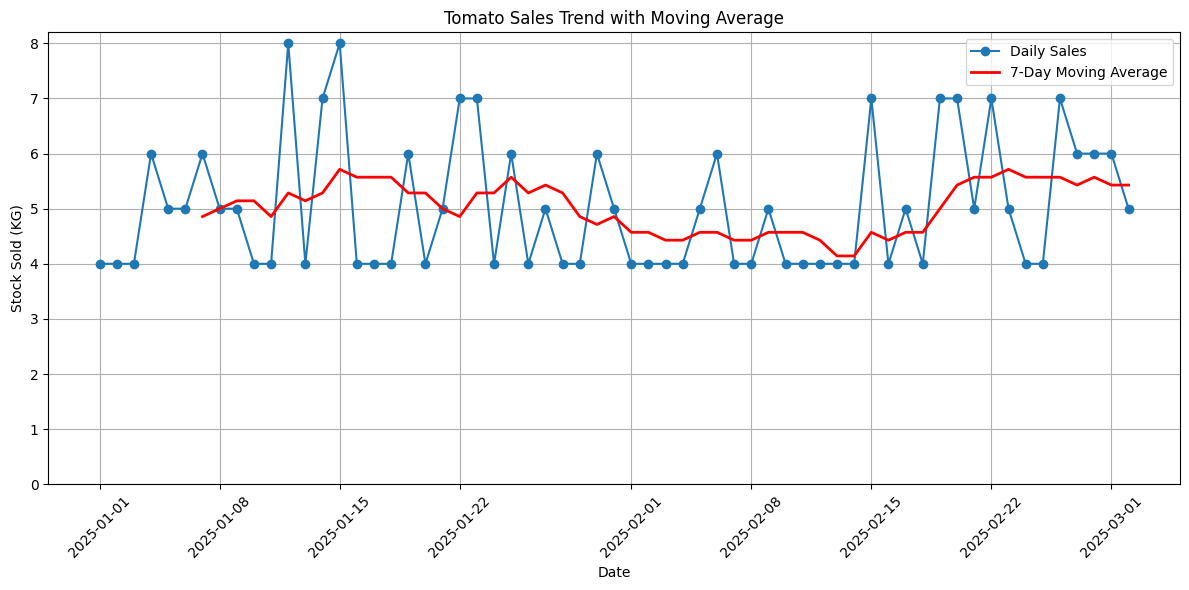

In [ ]:
# Filter for Tomato
tomato_sales = daily_sales[daily_sales["Product_Name_Sales"] == "Tomato"].copy()

# Calculate 7-day moving average
tomato_sales["7_day_MA"] = tomato_sales["Stock_Sold(KG)"].rolling(window=7).mean()

# Plot
plt.figure(figsize=(12,6))
plt.plot(tomato_sales["Date"], tomato_sales["Stock_Sold(KG)"], label="Daily Sales", marker="o")
plt.plot(tomato_sales["Date"], tomato_sales["7_day_MA"], label="7-Day Moving Average", color="red", linewidth=2)
plt.title("Tomato Sales Trend with Moving Average")
plt.xlabel("Date")
plt.ylabel("Stock Sold (KG)")
plt.legend()
plt.grid(True)
plt.ylim(bottom=0)
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


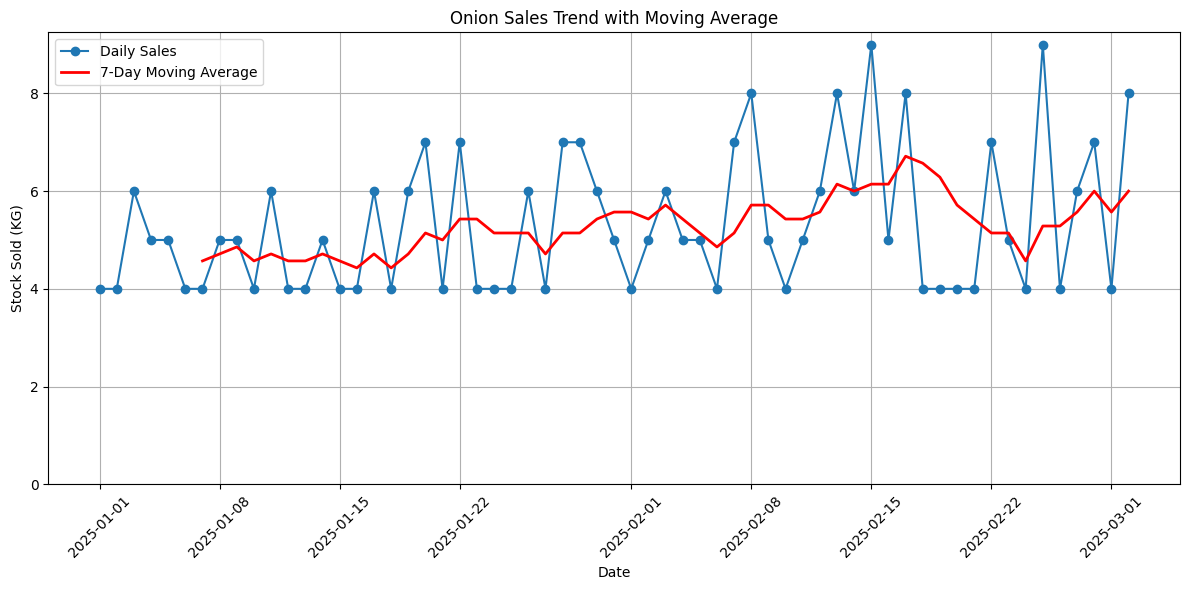

In [ ]:
# Filter for Onion
onion_sales = daily_sales[daily_sales["Product_Name_Sales"] == "Onion"].copy()

# Calculate 7-day moving average
onion_sales["7_day_MA"] = onion_sales["Stock_Sold(KG)"].rolling(window=7).mean()

# Plot
plt.figure(figsize=(12,6))
plt.plot(onion_sales["Date"], onion_sales["Stock_Sold(KG)"], label="Daily Sales", marker="o")
plt.plot(onion_sales["Date"], onion_sales["7_day_MA"], label="7-Day Moving Average", color="red", linewidth=2)
plt.title("Onion Sales Trend with Moving Average")
plt.xlabel("Date")
plt.ylabel("Stock Sold (KG)")
plt.legend()
plt.ylim(bottom=0)
plt.grid(True)
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

# Price Vs Demand Analysis

In [ ]:
# We’ll analyze Selling Price per Kg vs Stock Sold (i.e., demand).
# Extract only relevant columns
price_demand = merged_df[["Product_Name_Sales", "Selling_Price_per_Kg(Rs)", "Stock_Sold(KG)"]].copy()

# Drop any rows with missing or zero values
price_demand = price_demand[(price_demand["Selling_Price_per_Kg(Rs)"] > 0) &
                             (price_demand["Stock_Sold(KG)"] > 0)]
price_demand

,Product_Name_Sales,Selling_Price_per_Kg(Rs),Stock_Sold(KG)
0,Tomato,62.40,4
1,Brinjal,43.85,5
2,Carrot,63.27,7
3,Capsicum,48.60,4
4,Ladysfinger,17.12,7
...,...,...,...
1154,Snake Gourd,19.96,5
1155,Lemon,66.27,5
1156,Chayote,37.30,4
1157,Coriander,37.57,7


In [ ]:
correlation = price_demand["Selling_Price_per_Kg(Rs)"].corr(price_demand["Stock_Sold(KG)"])
print(f"Correlation between Price and Demand: {correlation:.4f}")

# Negative correlation (~ -1): Higher prices → Lower sales → Elastic demand

Correlation between Price and Demand: -0.0302


In [ ]:
# Example: Tomato
tomato_df = price_demand[price_demand["Product_Name_Sales"] == "Chayote"]
cor_tomato = tomato_df["Selling_Price_per_Kg(Rs)"].corr(tomato_df["Stock_Sold(KG)"])
print(f"Tomato: Correlation between price and demand = {cor_tomato:.2f}")


Tomato: Correlation between price and demand = 0.11


**Demand Calculation**

In [ ]:
# Total quantity sold per product
demand_per_product = merged_df.groupby("Product_Name_Sales")["Stock_Sold(KG)"].sum().sort_values(ascending=False).reset_index()
demand_per_product

,Product_Name_Sales,Stock_Sold(KG)
0,Chayote,335
1,Beans,329
2,Snake Gourd,328
3,Ladysfinger,325
4,Capsicum,325
5,Onion,324
6,Ridge Gourd,324
7,Carrot,323
8,Cucumber,323
9,Green Chilli,321


In [ ]:
# Total demand per day (all products)
daily_demand = merged_df.groupby("Date")["Stock_Sold(KG)"].sum().reset_index()


In [ ]:
# Example using customer_df
demand_per_customer = customer_df.groupby("Customer_Id")["Quantity_Purchased(KG)"].sum().sort_values(ascending=False).reset_index()


In [ ]:
# Daily demand breakdown for each product
product_daily_demand = merged_df.groupby(["Date", "Product_Name_Sales"])["Stock_Sold(KG)"].sum().reset_index()


In [ ]:
# Sales of all the products in the given time period
# Assuming you merged product category info in merged_df
demand_per_category = merged_df.groupby("Product_Name_Market")["Stock_Sold(KG)"].sum().reset_index()
demand_per_category

,Product_Name_Market,Stock_Sold(KG)
0,Beans,329
1,Brinjal,316
2,Cabbage,320
3,Capsicum,325
4,Carrot,323
5,Chayote,335
6,Coconut,313
7,Coriander,310
8,Cucumber,323
9,Green Chilli,321


In [ ]:
# prompt: Using dataframe demand_per_category: bar plot

import altair as alt

alt.Chart(demand_per_category).mark_bar().encode(
    x='Product_Name_Market',
    y='Stock_Sold(KG)'
)


alt.Chart(...)

# Heatmap

In [ ]:
# Group by product and compute correlation
product_elasticity = []

for product in price_demand["Product_Name_Sales"].unique():
    sub_df = price_demand[price_demand["Product_Name_Sales"] == product]
    if len(sub_df) > 1:  # Avoid single-point correlation
        corr = sub_df["Selling_Price_per_Kg(Rs)"].corr(sub_df["Stock_Sold(KG)"])
        product_elasticity.append((product, corr))

# Convert to DataFrame
elasticity_df = pd.DataFrame(product_elasticity, columns=["Product_Name", "Price_Demand_Correlation"])


In [ ]:
# Set index for heatmap
elasticity_df.set_index("Product_Name", inplace=True)

# Optional: sort by elasticity
elasticity_df = elasticity_df.sort_values(by="Price_Demand_Correlation")


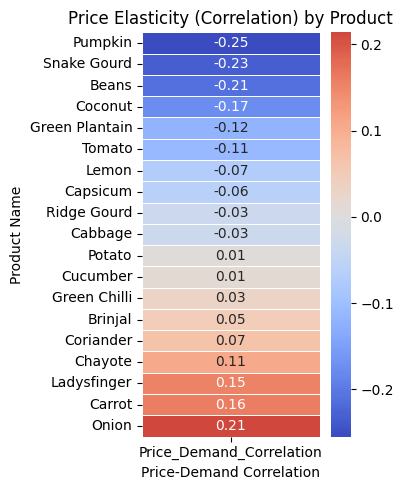

In [ ]:
plt.figure(figsize=(4,5))
sns.heatmap(elasticity_df, annot=True, cmap="coolwarm", center=0, linewidths=0.5, fmt=".2f")
plt.title("Price Elasticity (Correlation) by Product")
plt.xlabel("Price-Demand Correlation")
plt.ylabel("Product Name")
plt.tight_layout()
plt.show()


| Correlation Range | Meaning | Action |
|------------------|---------|--------|
| -0.8 to -1.0 | Highly elastic | Lower price increases sales significantly |
| -0.3 to -0.7 | Moderately elastic | Be cautious with price hikes |
| -0.1 to 0.1 | Inelastic | Customers buy regardless of price |
| > 0.1 | Unusual case | Investigate (may be niche/premium item) |

# Profitability Analysis

In [ ]:
# Ensure necessary fields exist
merged_df["Revenue"] = merged_df["Selling_Price_per_Kg(Rs)"] * merged_df["Stock_Sold(KG)"]
merged_df["Cost"] = merged_df["Wholesale_Price(Rs)"] * merged_df["Stock_Sold(KG)"]
merged_df["Profit"] = merged_df["Revenue"] - merged_df["Cost"]


/tmp/ipython-input-94-1279165341.py:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  barplot = sns.barplot(x=product_profit.values, y=product_profit.index, palette="viridis")


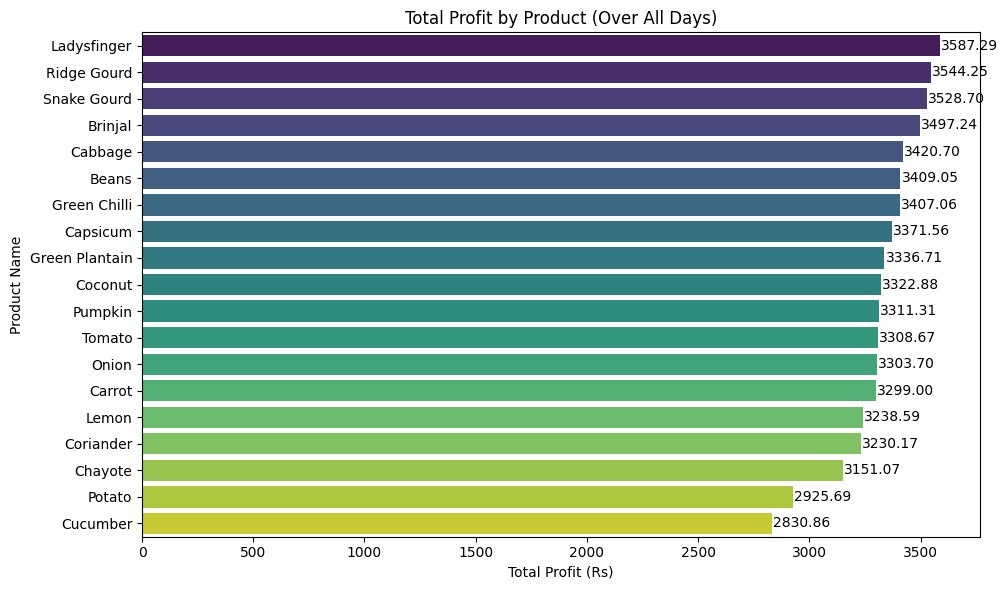

In [ ]:
# Group total profit per product
product_profit = merged_df.groupby("Product_Name_Sales")["Profit"].sum().sort_values(ascending=False)

# Bar plot
plt.figure(figsize=(10,6))
barplot = sns.barplot(x=product_profit.values, y=product_profit.index, palette="viridis")
plt.title("Total Profit by Product (Over All Days)")
plt.xlabel("Total Profit (Rs)")
plt.ylabel("Product Name")
plt.tight_layout()

# Add value labels on bars
for index, value in enumerate(product_profit.values):
    plt.text(value + 5, index, f'{value:.2f}', va='center')

plt.show()


# Customer Purchase Analysis

In [ ]:
total_spend = customer_df.groupby("Customer_Name")["Total_Price(Rs)"].sum().reset_index()
total_spend = total_spend.sort_values(by="Total_Price(Rs)", ascending=False)
total_spend.head(10)

,Customer_Name,Total_Price(Rs)
16,Indira,5417.61
15,Ilangovan,5355.60
13,Harikrishnan,5296.08
21,Lalitha,5092.06
4,Chandrasekaran,5036.57
1,Arumugam,4918.59
6,Devi,4897.89
20,Kasi Viswanathan,4873.00
10,Fathima,4803.73
7,Dhandapani,4649.25


In [ ]:
top_products = customer_df["Product_Name"].value_counts().reset_index()
top_products.columns = ["Product_Name", "Purchase_Count"]
top_products

,Product_Name,Purchase_Count
0,Tomato,268
1,Onion,262
2,Lemon,254
3,Green Chilli,247
4,Chayote,246
5,Pumpkin,244
6,Brinjal,242
7,Carrot,239
8,Ridge Gourd,237
9,Coriander,237


/tmp/ipython-input-133-3129286766.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.barplot(data=top_products.head(10), x="Purchase_Count", y="Product_Name", palette="magma")


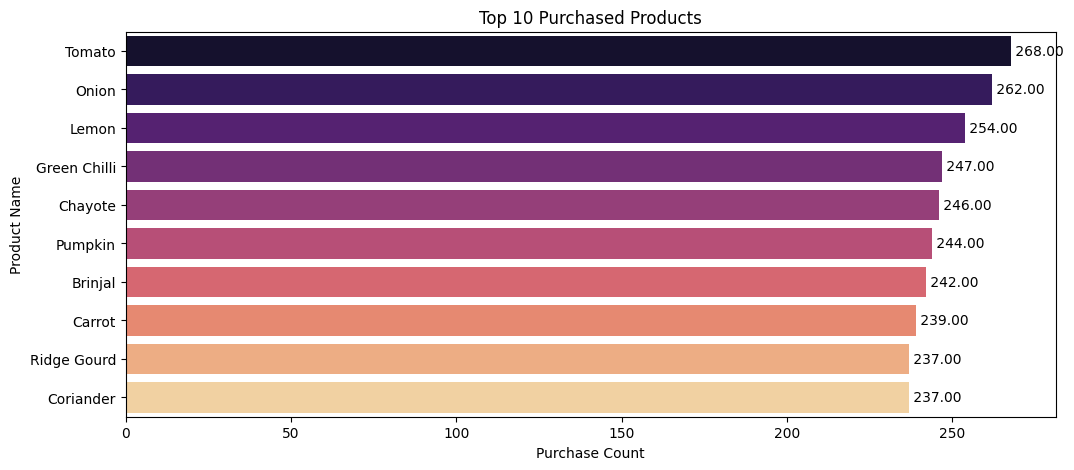

In [ ]:
plt.figure(figsize=(12,5))
ax = sns.barplot(data=top_products.head(10), x="Purchase_Count", y="Product_Name", palette="magma")
plt.title("Top 10 Purchased Products")
plt.xlabel("Purchase Count")
plt.ylabel("Product Name")

for container in ax.containers:
    ax.bar_label(container, fmt=' %.2f')
plt.show()

In [ ]:
# Top customers by purchase frequency
purchase_freq = customer_df["Customer_Name"].value_counts().reset_index()
purchase_freq.columns = ["Customer_Name", "Purchase_Count"]
purchase_freq.head(10)

,Customer_Name,Purchase_Count
0,Harikrishnan,178
1,Indira,177
2,Lalitha,169
3,Kasi Viswanathan,161
4,Devi,159
5,Arumugam,158
6,Chandrasekaran,158
7,Nalini,153
8,Janaki,152
9,Chitra,152


In [ ]:
# Add weekday
customer_df["Weekday"] = customer_df["Date"].dt.day_name()

# Average spend by weekday
weekday_spend = customer_df.groupby("Weekday")["Total_Price(Rs)"].mean().reset_index()

# Sort weekdays properly
weekday_order = ["Monday", "Tuesday", "Wednesday", "Thursday", "Friday", "Saturday", "Sunday"]
weekday_spend["Weekday"] = pd.Categorical(weekday_spend["Weekday"], categories=weekday_order, ordered=True)
weekday_spend = weekday_spend.sort_values("Weekday")
weekday_spend

,Weekday,Total_Price(Rs)
1,Monday,29.740962
5,Tuesday,29.863610
6,Wednesday,32.492469
4,Thursday,29.864163
0,Friday,30.246079
2,Saturday,28.497662
3,Sunday,29.285450


So, The sales remain constant over all the 7 days of the week. And there is no proper distinction between weekday sales and weekend sales.

In [ ]:
# Count purchases by Loyal customer and Product
loyalty = customer_df.groupby(["Customer_Name", "Product_Name"]).size().reset_index(name="Purchase_Count")

# Filter for those who bought the same product multiple times
loyal_customers = loyalty[loyalty["Purchase_Count"] > 1]
loyal_customers

,Customer_Name,Product_Name,Purchase_Count
0,Alamelu,Beans,10
1,Alamelu,Brinjal,4
2,Alamelu,Cabbage,5
3,Alamelu,Capsicum,9
4,Alamelu,Carrot,3
...,...,...,...
565,Uma,Potato,9
566,Uma,Pumpkin,5
567,Uma,Ridge Gourd,7
568,Uma,Snake Gourd,4


# **Customer Pattern Clustering**

**K-means clustering**

In [ ]:
# Total spend and number of purchases per customer
customer_summary = customer_df.groupby("Customer_Id").agg({
    "Total_Price(Rs)": "sum",
    "Quantity_Purchased(KG)": "sum"
}).rename(columns={
    "Total_Price(Rs)": "Total_Spend",
    "Quantity_Purchased(KG)": "Total_Quantity"
}).reset_index()


In [ ]:
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler

# Normalize the data
scaler = StandardScaler()
X_scaled = scaler.fit_transform(customer_summary[["Total_Spend", "Total_Quantity"]])

# Fit KMeans (you can choose n_clusters=3 as default)
kmeans = KMeans(n_clusters=3, random_state=42)
customer_summary["Cluster"] = kmeans.fit_predict(X_scaled)


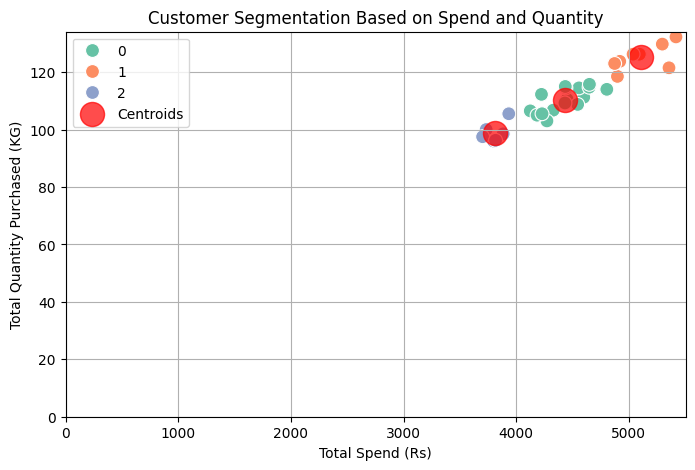

In [ ]:
# prompt: Generate the same plot for the customer segmentation with the centroids for each of the clusters

import matplotlib.pyplot as plt
# Get cluster centers
centers = kmeans.cluster_centers_
# Inverse transform the centers to original scale for plotting
centers_original_scale = scaler.inverse_transform(centers)

plt.figure(figsize=(8,5))
sns.scatterplot(data=customer_summary, x="Total_Spend", y="Total_Quantity", hue="Cluster", palette="Set2", s=100)
plt.scatter(centers_original_scale[:, 0], centers_original_scale[:, 1], c='red', s=300, alpha=0.7, label='Centroids')
plt.title("Customer Segmentation Based on Spend and Quantity")
plt.xlabel("Total Spend (Rs)")
plt.ylabel("Total Quantity Purchased (KG)")
plt.grid(True)
plt.ylim(bottom=0)
plt.xlim(left=0)
plt.legend()
plt.show()


In [ ]:
# Values for the centroid

print("Centroid values (Total Spend, Total Quantity):")
for i, center in enumerate(centers_original_scale):
  print(f"  Cluster {i}: ({center[0]:.2f}, {center[1]:.2f})")

Centroid values (Total Spend, Total Quantity):
  Cluster 0: (4432.49, 110.45)
  Cluster 1: (5110.93, 125.16)
  Cluster 2: (3810.91, 98.96)


Insights:
Cluster 0: Bulk buyers at Medium spendings, large quantity → Target with loyalty programs

Cluster 1: Bulk buyers at high spending → Encourage with discounts or small bundles

Cluster 2: Low spenders → Optimize price-sensitive offers

In [ ]:
# Cluster Profiling (Very Important)

# Average metrics per cluster
cluster_profiles = customer_summary.groupby("Cluster")[["Total_Spend", "Total_Quantity"]].mean()
cluster_profiles["Customer_Count"] = customer_summary["Cluster"].value_counts()


styled_stats6 = cluster_profiles.style.set_table_styles([
    {'selector': 'th', 'props': [('text-align', 'center')]},
    {'selector': 'td', 'props': [('text-align', 'center')]},
    {'selector': '', 'props': [('border', '1px solid black')]}  # Add gridlines
])
styled_stats6

,Total_Spend,Total_Quantity,Customer_Count
Cluster,,,
0,4432.492500,110.453125,16
1,5110.925000,125.156250,8
2,3810.905000,98.958333,6


**Cluster 0:** Medium spend, medium quantity → Premium buyers

**Cluster 1:** High spend, high quantity → Bulk buyers

**Cluster 2:** Low spend, low quantity → Occational buyers

In [ ]:
# First, make sure you have this structure:
# customer_summary has columns: Customer_Id, Total_Spend, Total_Quantity, Cluster

# Group by Cluster to get the profile
cluster_summary = customer_summary.groupby("Cluster").agg({
    "Total_Spend": ["mean", "min", "max"],
    "Total_Quantity": ["mean", "min", "max"],
    "Customer_Id": "count"
}).round(2)

# Rename columns
cluster_summary.columns = [
    "Avg_Spend", "Min_Spend", "Max_Spend",
    "Avg_Quantity", "Min_Quantity", "Max_Quantity",
    "Customer_Count"
]

# Reset index for display
cluster_summary = cluster_summary.reset_index()

# Display
styled_stats = cluster_summary.style.set_table_styles([
    {'selector': 'th', 'props': [('text-align', 'center')]},
    {'selector': 'td', 'props': [('text-align', 'center')]},
    {'selector': '', 'props': [('border', '1px solid black')]}  # Add gridlines
])
styled_stats


,Cluster,Avg_Spend,Min_Spend,Max_Spend,Avg_Quantity,Min_Quantity,Max_Quantity,Customer_Count
0,0,4432.490000,4124.170000,4803.730000,110.450000,103.000000,115.750000,16
1,1,5110.920000,4873.000000,5417.610000,125.160000,118.500000,132.250000,8
2,2,3810.900000,3700.910000,3933.480000,98.960000,96.000000,105.500000,6


# ABC Analysis

In [ ]:
# Group total revenue by product
product_revenue = merged_df.groupby("Product_Name_Sales")["Revenue"].sum().sort_values(ascending=False).reset_index()


In [ ]:
product_revenue["Cumulative_Revenue"] = product_revenue["Revenue"].cumsum()
product_revenue["Cumulative_Revenue_%"] = 100 * product_revenue["Cumulative_Revenue"] / product_revenue["Revenue"].sum()


In [ ]:
def classify_abc(cum_pct):
    if cum_pct <= 80:
        return 'A'
    elif cum_pct <= 95:
        return 'B'
    else:
        return 'C'

product_revenue["ABC_Class"] = product_revenue["Cumulative_Revenue_%"].apply(classify_abc)


In [ ]:
product_revenue  # Top A-class products
styled_stats3 = product_revenue.style.set_table_styles([
    {'selector': 'th', 'props': [('text-align', 'center')]},
    {'selector': 'td', 'props': [('text-align', 'center')]},
    {'selector': '', 'props': [('border', '1px solid black')]}  # Add gridlines
])
styled_stats3

,Product_Name_Sales,Revenue,Cumulative_Revenue,Cumulative_Revenue_%,ABC_Class
0,Ladysfinger,13737.530000,13737.530000,5.658449,A
1,Ridge Gourd,13589.780000,27327.310000,11.256039,A
2,Snake Gourd,13453.500000,40780.810000,16.797497,A
3,Brinjal,13437.370000,54218.180000,22.332310,A
4,Cabbage,13232.900000,67451.080000,27.782903,A
5,Green Chilli,13115.720000,80566.800000,33.185230,A
6,Beans,13107.030000,93673.830000,38.583978,A
7,Coconut,12907.410000,106581.240000,43.900502,A
8,Green Plantain,12846.270000,119427.510000,49.191843,A
9,Capsicum,12845.550000,132273.060000,54.482888,A


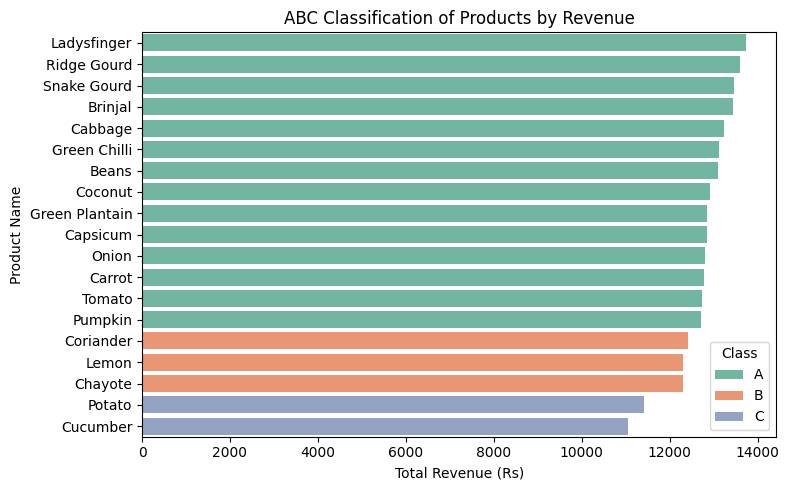

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(8,5))
sns.barplot(data=product_revenue, x="Revenue", y="Product_Name_Sales", hue="ABC_Class", dodge=False, palette="Set2")
plt.title("ABC Classification of Products by Revenue")
plt.xlabel("Total Revenue (Rs)")
plt.ylabel("Product Name")
plt.legend(title="Class")
plt.tight_layout()

plt.show()


"Using ABC Analysis, we classified vegetables into three categories based on their total contribution to revenue:

A-class items (top ~20%) like Tomato and Beans contribute most of the revenue and require strict stock control to prevent both wastage and stockouts.

B-class items contribute moderately and should be reviewed regularly.

C-class items have low revenue impact but may still move in large volumes. These can be managed in bulk with simpler controls."

In [ ]:
# Group by ABC class
abc_summary = product_revenue.groupby("ABC_Class").agg({
    "Product_Name_Sales": "count",
    "Revenue": "sum"
}).rename(columns={"Product_Name_Sales": "Product_Count", "Revenue": "Total_Revenue"}).reset_index()

# Calculate revenue percentage
total_revenue_all = abc_summary["Total_Revenue"].sum()
abc_summary["Revenue_%"] = (abc_summary["Total_Revenue"] / total_revenue_all * 100).round(2)

# Display
abc_summary

styled_stats4 = abc_summary.style.set_table_styles([
    {'selector': 'th', 'props': [('text-align', 'center')]},
    {'selector': 'td', 'props': [('text-align', 'center')]},
    {'selector': '', 'props': [('border', '1px solid black')]}  # Add gridlines
])
styled_stats4


,ABC_Class,Product_Count,Total_Revenue,Revenue_%
0,A,14,183294.820000,75.500000
1,B,3,37018.030000,15.250000
2,C,2,22466.240000,9.250000


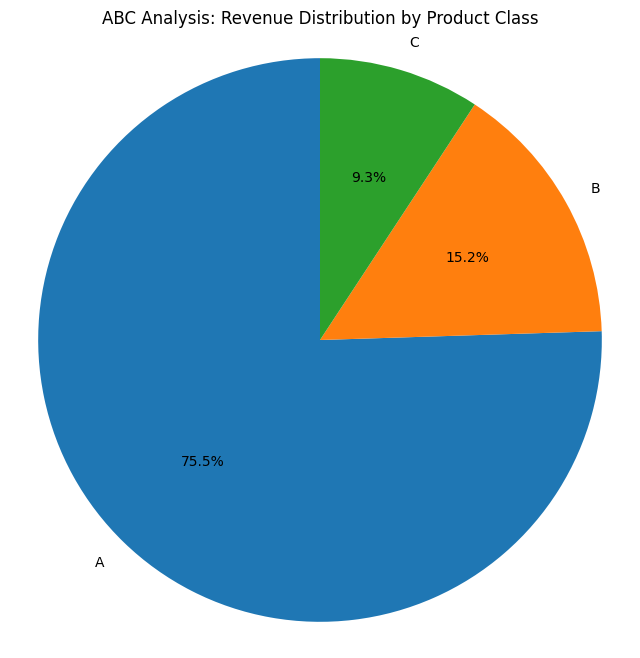

In [ ]:
# prompt: For the above ABC summary, generate a pie chart

import matplotlib.pyplot as plt

# Assuming 'product_revenue' DataFrame from the previous code is available

# Data for the pie chart
labels = product_revenue['ABC_Class'].unique()
sizes = product_revenue.groupby('ABC_Class')['Revenue'].sum()

# Create the pie chart
plt.figure(figsize=(8, 8))
plt.pie(sizes, labels=labels, autopct='%1.1f%%', startangle=90)
plt.title('ABC Analysis: Revenue Distribution by Product Class')
plt.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.
plt.show()


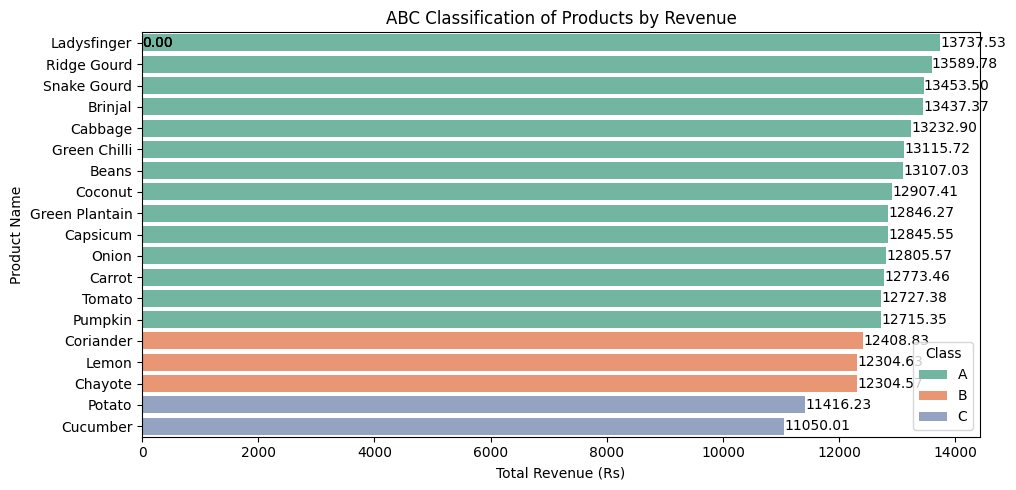

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(10,5))
barplot = sns.barplot(data=product_revenue, x="Revenue", y="Product_Name_Sales", hue="ABC_Class", dodge=False, palette="Set2")
plt.title("ABC Classification of Products by Revenue")
plt.xlabel("Total Revenue (Rs)")
plt.ylabel("Product Name")
plt.legend(title="Class")
plt.tight_layout()

# Add value labels to bars
for patch in barplot.patches:
    width = patch.get_width()
    y = patch.get_y() + patch.get_height() / 2
    plt.text(width + 5, y, f'{width:.2f}', va='center')

plt.show()


# **Steps to reduce wastage**

In [ ]:
# 1. Plot daily wastage per product.

# Wastage = Stock Purchased - Stock Sold
merged_df["Wastage(KG)"] = merged_df["Stock_Purchased(KG)"] - merged_df["Stock_Sold(KG)"]

# Wastage % = Wastage / Stock Purchased
merged_df["Wastage_%"] = (merged_df["Wastage(KG)"] / merged_df["Stock_Purchased(KG)"]) * 100



/tmp/ipython-input-135-1071277477.py:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.barplot(x=avg_wastage.values[:10], y=avg_wastage.index[:10], palette="Reds_r")


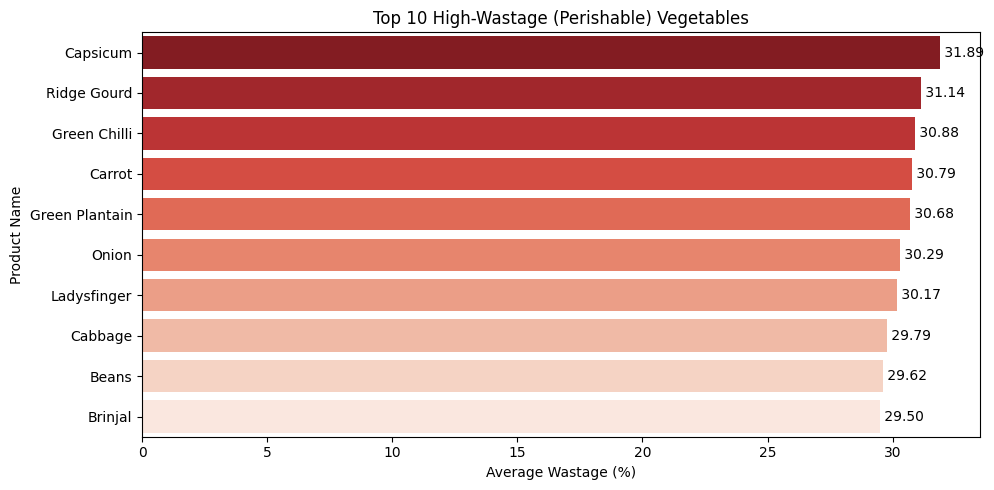

In [ ]:
# Average wastage % per product
avg_wastage = merged_df.groupby("Product_Name_Sales")["Wastage_%"].mean().sort_values(ascending=False)

# Bar plot for top 10 high-perishability products
plt.figure(figsize=(10,5))
ax = sns.barplot(x=avg_wastage.values[:10], y=avg_wastage.index[:10], palette="Reds_r")
plt.title("Top 10 High-Wastage (Perishable) Vegetables")
plt.xlabel("Average Wastage (%)")
plt.ylabel("Product Name")
plt.tight_layout()

for container in ax.containers:
    ax.bar_label(container, fmt=' %.2f')
plt.show()


In [ ]:
# Check correlation
correlation = merged_df["Stock_Purchased(KG)"].corr(merged_df["Wastage(KG)"])
print(f"Correlation between Stock Purchased and Wastage: {correlation:.2f}")


Correlation between Stock Purchased and Wastage: 0.63


"**A correlation coefficient of +0.63** was observed between the quantity of stock purchased and wastage incurred.
This moderately strong positive relationship suggests that *overstocking is a key driver of wastage*, especially in the case of perishable or slow-moving products.
It reinforces the need for improved demand forecasting and dynamic stock planning to prevent unnecessary losses and optimize resource utilization."

## Stock Optimization Strategy Overview: "Dynamic Reorder Point + Priority Stocking"

This strategy uses:

1. Reorder Point (ROP) based on moving average sales

2. Stock Priority Classification based on perishability and wastage %

3. Stock Adjustment Rules to prevent overstocking

In [ ]:
# Compute 7-day moving average of Stock Sold
merged_df["Daily_Avg_Sales"] = merged_df.groupby("Product_Name_Sales")["Stock_Sold(KG)"].transform(lambda x: x.rolling(window=7, min_periods=1).mean())
merged_df["Daily_Avg_Sales"]

,Daily_Avg_Sales
0,4.000000
1,5.000000
2,7.000000
3,4.000000
4,7.000000
...,...
1154,5.428571
1155,5.857143
1156,4.571429
1157,5.428571


In [ ]:
# Reorder Point
lead_time = 2
merged_df["Reorder_Point"] = merged_df["Daily_Avg_Sales"] * lead_time
merged_df['Reorder_Point']


,Reorder_Point
0,8.000000
1,10.000000
2,14.000000
3,8.000000
4,14.000000
...,...
1154,10.857143
1155,11.714286
1156,9.142857
1157,10.857143


In [ ]:
# Perishability
# Average wastage per product
avg_wastage = merged_df.groupby("Product_Name_Sales")["Wastage_%"].mean()

# Add category: High, Medium, Low Perishability
def classify_perishability(w):
    if w > 30: # If wastage greater than 30%
        return "High"
    elif w > 27:
        return "Medium"
    else:
        return "Low"

merged_df["Perishability_Risk"] = merged_df["Product_Name_Sales"].map(avg_wastage).apply(classify_perishability)
merged_df["Perishability_Risk"].unique()


array(['Low', 'Medium', 'High'], dtype=object)

In [ ]:
# Adjusted Optimal Stock level
def adjust_stock(row):
    if row["Perishability_Risk"] == "High":
        return 0.8 * row["Reorder_Point"]
    elif row["Perishability_Risk"] == "Medium":
        return row["Reorder_Point"]
    else:
        return 1.2 * row["Reorder_Point"]

merged_df["Optimal_Stock_Level"] = merged_df.apply(adjust_stock, axis=1)
merged_df["Optimal_Stock_Level"]

,Optimal_Stock_Level
0,9.600000
1,10.000000
2,11.200000
3,6.400000
4,11.200000
...,...
1154,13.028571
1155,11.714286
1156,9.142857
1157,10.857143


In [ ]:
# Calculate the difference between Stock_Purchased(KG) and Optimal_Stock_Level

# Highlight overstocking or understocking

merged_df["Stock_Difference"] = merged_df["Stock_Purchased(KG)"] - merged_df["Optimal_Stock_Level"]


In [ ]:
merged_df["Overstock_Flag"] = merged_df["Stock_Difference"] > 0


In [ ]:
# Only for rows where stock purchased exceeds optimal, Estimate avoidable wastage by checking:
avoidable_wastage = merged_df[merged_df["Stock_Difference"] > 0]["Stock_Difference"].sum()
print(f"Estimated Avoidable Overstock (KG): {avoidable_wastage:.2f}")


Estimated Avoidable Overstock (KG): 173.48


Based on our optimized stock level strategy, we identified an estimated avoidable overstocking of 173.48 KG across all products during the analysis period. This surplus stock, particularly in high-wastage items, represents an opportunity to reduce wastage and improve inventory efficiency. Implementing the optimized reorder system could significantly mitigate these losses and improve profit margins.

## potential profit gain and wastage savings

In [ ]:
# Estimate avoidable wastage
# Estimated Avoidable Overstock (KG): 173.48

avoidable_wastage_kg = 173.48 * 0.80  # 80% of overstock because it has high perishability
print(f"Avoidable Wastage (KG): {avoidable_wastage_kg:.2f}")

Avoidable Wastage (KG): 138.78


In [ ]:
# Filter only overstocked rows
overstock_df = merged_df[merged_df["Stock_Difference"] > 0]

# Calculate weighted average wholesale price based on overstock quantity
weighted_price = (overstock_df["Wholesale_Price(Rs)"] * overstock_df["Stock_Difference"]).sum()
total_overstock_kg = overstock_df["Stock_Difference"].sum()

# Actual average wholesale price of overstocked items
avg_wholesale_price = weighted_price / total_overstock_kg
print(f"Actual Avg Wholesale Price: ₹{avg_wholesale_price:.2f}")


Actual Avg Wholesale Price: ₹31.70


In [ ]:
 # You can compute actual value if needed
wastage_cost_saved = avoidable_wastage_kg * avg_wholesale_price
print(f"Estimated Wastage Cost Saved: ₹{wastage_cost_saved:.2f}")


Estimated Wastage Cost Saved: ₹4399.70


In [ ]:
# Filter only rows where stock was sold (to avoid division by zero)
sold_df = merged_df[merged_df["Stock_Sold(KG)"] > 0]

# Calculate profit per KG for each row
sold_df["Profit_per_KG"] = sold_df["Profit"] / sold_df["Stock_Sold(KG)"]

# Compute the actual average profit per KG
avg_profit_per_kg = sold_df["Profit_per_KG"].mean()
print(f"Actual Average Profit per KG: ₹{avg_profit_per_kg:.2f}")


Actual Average Profit per KG: ₹10.41


In [ ]:
#avg_profit_per_kg = 15
potential_profit_gain = avoidable_wastage_kg * avg_profit_per_kg
print(f"Potential Profit Gain: ₹{potential_profit_gain:.2f}")


Potential Profit Gain: ₹1445.17


In [ ]:
# Filter only rows where overstocking occurred
overstock_df = merged_df[merged_df["Stock_Difference"] > 0]

# Group by product and sum the overstock
overstock_by_product = overstock_df.groupby("Product_Name_Sales")["Stock_Difference"].sum().sort_values(ascending=False).round(2)

# Display top contributors
overstock_by_product.head(10)


,Stock_Difference
Product_Name_Sales,
Green Plantain,28.56
Carrot,25.75
Green Chilli,23.71
Capsicum,23.57
Ridge Gourd,23.23
Onion,21.02
Ladysfinger,15.51
Chayote,2.57
Lemon,2.43


# Results and Recommendations

In [ ]:
# Problem Statement 1: Overcome stagnant Sales

import pandas as pd
data = {'Metric': ['Average Daily Revenue', 'Average Daily Profit', 'Recommended Target Profit Margin', 'Seasonality Insight', 'Top-Revenue driving products'],
        'Value': ['₹ 3,979.99', '₹ 1033.19', '~35% approx', 'Similar trend on all days', ('Lady'"s"'finger','Brinjal')]}
df_metrics1 = pd.DataFrame(data)

styled_stats42 = df_metrics1.style.set_table_styles([
    {'selector': 'th', 'props': [('text-align', 'center')]},
    {'selector': 'td', 'props': [('text-align', 'center')]},
    {'selector': '', 'props': [('border', '1px solid black')]}  # Add gridlines
])
styled_stats42



,Metric,Value
0,Average Daily Revenue,"₹ 3,979.99"
1,Average Daily Profit,₹ 1033.19
2,Recommended Target Profit Margin,~35% approx
3,Seasonality Insight,Similar trend on all days
4,Top-Revenue driving products,"('Ladysfinger', 'Brinjal')"


In [ ]:
# Problem Statement 2: Reduce Wastage

import pandas as pd
data = {'Metric': ['Avoidable Overstock (KG)', 'Estimated Avoidable Wastage', 'Wastage Cost Saved', 'Potential Profit Gain', 'Correlation: Stock vs Wastage'],
        'Value': ['173.48 KG', '138.78 KG (80%)', '₹4399.70', '₹1445.17', '+0.63']}
df_metrics = pd.DataFrame(data)

styled_stats41 = df_metrics.style.set_table_styles([
    {'selector': 'th', 'props': [('text-align', 'center')]},
    {'selector': 'td', 'props': [('text-align', 'center')]},
    {'selector': '', 'props': [('border', '1px solid black')]}  # Add gridlines
])
styled_stats41

,Metric,Value
0,Avoidable Overstock (KG),173.48 KG
1,Estimated Avoidable Wastage,138.78 KG (80%)
2,Wastage Cost Saved,₹4399.70
3,Potential Profit Gain,₹1445.17
4,Correlation: Stock vs Wastage,+0.63
